In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid

from training_utils import prepare_dataset, print_metrics

random_seed = 42

In [2]:
Xtrain, ytrain, Xval, yval, sample_weight = prepare_dataset()
print(f"Training samples: {Xtrain.shape[0]}, Validation samples: {Xval.shape[0]}")

Training samples: 4976, Validation samples: 247


In [14]:
param_grid = {
    'n_estimators': range(10,101,10),
    'max_depth': range(3,9),
    'min_samples_split': range(2,8),
    'min_samples_leaf': range(1,4)
}

best_accuracy = 0
best_params = None

for params in ParameterGrid(param_grid):
    clf = RandomForestClassifier(random_state=random_seed, **params)
    clf.fit(Xtrain, ytrain, sample_weight=sample_weight)
    
    yval_pred = clf.predict(Xval)
    accuracy = accuracy_score(yval, yval_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Best Validation Accuracy:", best_accuracy)

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 40}
Best Validation Accuracy: 0.7246963562753036


Accuracy: 0.7246963562753036
Confusion Matrix:
[[95 26]
 [42 84]]
F1 Score: 0.711864406779661
Best Threshold (Youden's J statistic): 0.5005328513059741


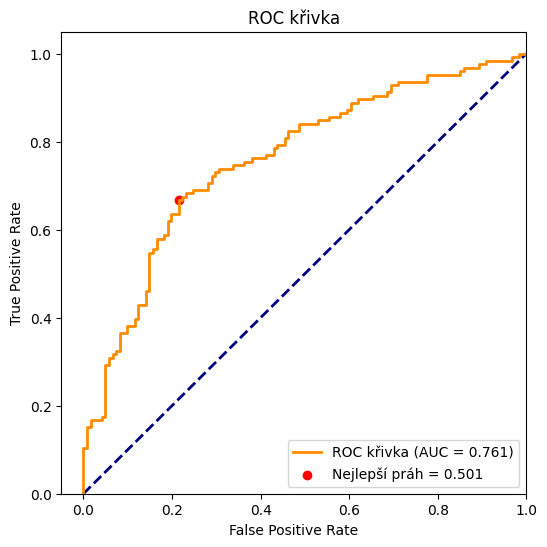

In [15]:
model = RandomForestClassifier(random_state=random_seed, **best_params)
model.fit(Xtrain, ytrain, sample_weight=sample_weight)

yval_pred = model.predict(Xval)
yval_proba = model.predict_proba(Xval)[:, 1]

print_metrics(yval, yval_pred, yval_proba)